In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('GOOGL', data_source='yahoo',start='2015-01-01',end='2017-09-27')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,535.799988,527.880005,532.599976,529.549988,1324000,529.549988
2015-01-05,527.989990,517.750000,527.150024,519.460022,2059100,519.460022
2015-01-06,521.210022,505.549988,520.500000,506.640015,2722800,506.640015
2015-01-07,511.489990,503.649994,510.950012,505.149994,2345900,505.149994
2015-01-08,507.500000,495.019989,501.510010,506.910004,3652700,506.910004
...,...,...,...,...,...,...
2017-09-21,952.799988,939.380005,948.130005,947.549988,1370700,947.549988
2017-09-22,950.000000,940.840027,942.770020,943.260010,1074800,943.260010
2017-09-25,939.750000,924.510010,939.450012,934.280029,1873400,934.280029


In [3]:
df.shape

(690, 6)

In [4]:
df.tail

<bound method NDFrame.tail of                   High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2015-01-02  535.799988  527.880005  532.599976  529.549988  1324000  529.549988
2015-01-05  527.989990  517.750000  527.150024  519.460022  2059100  519.460022
2015-01-06  521.210022  505.549988  520.500000  506.640015  2722800  506.640015
2015-01-07  511.489990  503.649994  510.950012  505.149994  2345900  505.149994
2015-01-08  507.500000  495.019989  501.510010  506.910004  3652700  506.910004
...                ...         ...         ...         ...      ...         ...
2017-09-21  952.799988  939.380005  948.130005  947.549988  1370700  947.549988
2017-09-22  950.000000  940.840027  942.770020  943.260010  1074800  943.260010
2017-09-25  939.750000  924.510010  939.450012  934.280029  1873400  934.280029
2017-09-26  944.080017  935.119995  936.690002  937.429993  1672700  937.429993
2017-09-27

Text(0, 0.5, 'Close Price USD ($) ')

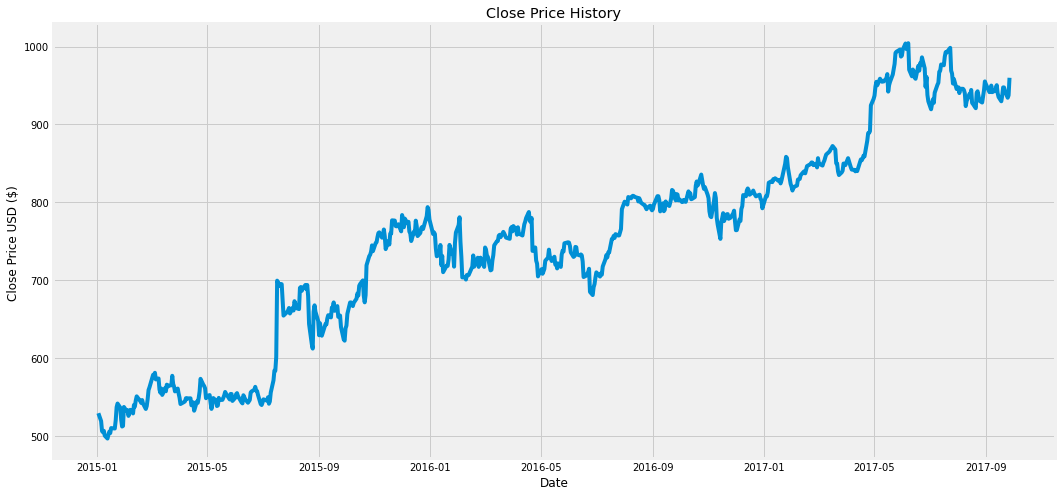

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price USD ($) ',fontsize=12)

In [6]:
import math
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .5)
training_data_len

345

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.06405502],
       [0.04416234],
       [0.0188873 ],
       [0.01594968],
       [0.01941959],
       [0.00721581],
       [0.        ],
       [0.00934504],
       [0.01748747],
       [0.01370216],
       [0.0264185 ],
       [0.02539333],
       [0.04599585],
       [0.07933439],
       [0.08850205],
       [0.07819087],
       [0.04757305],
       [0.03030242],
       [0.03187962],
       [0.07982727],
       [0.06927963],
       [0.07144826],
       [0.05725322],
       [0.06460711],
       [0.07259178],
       [0.06352279],
       [0.08497294],
       [0.08071448],
       [0.09650646],
       [0.10665978],
       [0.09453493],
       [0.08988215],
       [0.09737394],
       [0.08820628],
       [0.07479989],
       [0.08199603],
       [0.0991089 ],
       [0.12268833],
       [0.1292733 ],
       [0.1537006 ],
       [0.16113319],
       [0.16022636],
       [0.16633806],
       [0.14952096],
       [0.1518867 ],
       [0.12379239],
       [0.11559087],
       [0.126

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(80, len(train_data)):
  x_train.append(train_data[i-80:i, 0])
  y_train.append(train_data[i,0])
  if i<= 80:
    print(x_train)
    print(y_train)
    print()

[array([0.06405502, 0.04416234, 0.0188873 , 0.01594968, 0.01941959,
       0.00721581, 0.        , 0.00934504, 0.01748747, 0.01370216,
       0.0264185 , 0.02539333, 0.04599585, 0.07933439, 0.08850205,
       0.07819087, 0.04757305, 0.03030242, 0.03187962, 0.07982727,
       0.06927963, 0.07144826, 0.05725322, 0.06460711, 0.07259178,
       0.06352279, 0.08497294, 0.08071448, 0.09650646, 0.10665978,
       0.09453493, 0.08988215, 0.09737394, 0.08820628, 0.07479989,
       0.08199603, 0.0991089 , 0.12268833, 0.1292733 , 0.1537006 ,
       0.16113319, 0.16022636, 0.16633806, 0.14952096, 0.1518867 ,
       0.12379239, 0.11559087, 0.12639482, 0.11028745, 0.1273215 ,
       0.11937618, 0.13623274, 0.13132365, 0.13384727, 0.13467528,
       0.15866877, 0.13788888, 0.13126457, 0.11925789, 0.12633574,
       0.11363907, 0.10336735, 0.08724025, 0.09244512, 0.09423916,
       0.10208593, 0.10046926, 0.10149438, 0.1016916 , 0.08422387,
       0.08670789, 0.09159737, 0.07034421, 0.09358864, 0.0904

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(265, 80, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
model.compile(optimizer='adam' ,loss='mean_squared_error')

In [13]:
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
265/265 [==============================] - 8s 31ms/step - loss: 0.0057
Epoch 2/5
265/265 [==============================] - 8s 29ms/step - loss: 0.0036
Epoch 3/5
265/265 [==============================] - 8s 30ms/step - loss: 0.0024
Epoch 4/5
265/265 [==============================] - 8s 29ms/step - loss: 0.0022
Epoch 5/5
265/265 [==============================] - 8s 30ms/step - loss: 0.0019


In [14]:
test_data = scaled_data[training_data_len -80:,:]
x_test= []
y_test = dataset[training_data_len:,:]
for i in range(80, len(test_data)):
  x_test.append(test_data[i-80:i,0])

In [15]:
x_test = np.array(x_test)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.4830198426177534

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


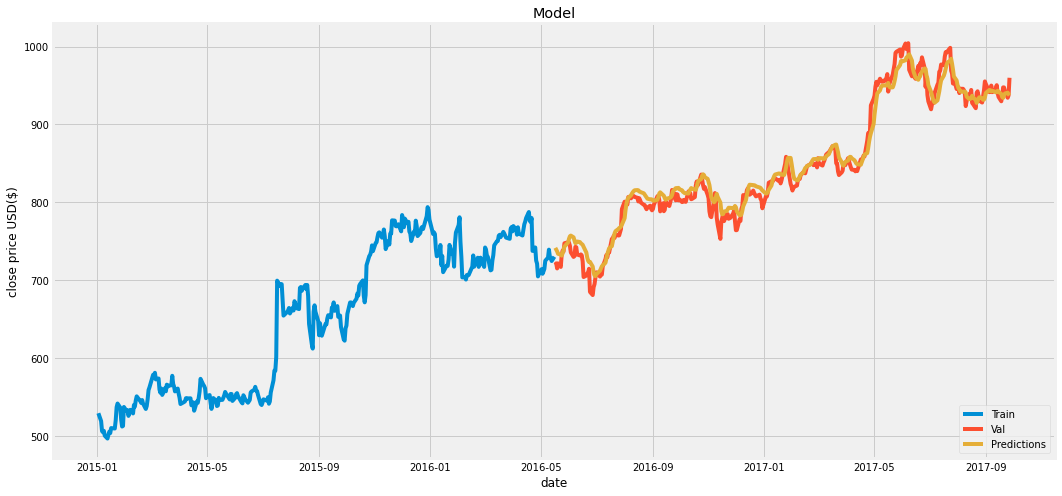

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize = 12)
plt.ylabel('close price USD($)',fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2016-05-17,720.190002,741.710327
2016-05-18,721.780029,739.275879
2016-05-19,715.309998,737.162415
2016-05-20,721.710022,734.056885
2016-05-23,717.250000,732.988708
...,...,...
2017-09-21,947.549988,936.764893
2017-09-22,943.260010,939.747131
2017-09-25,934.280029,940.862122
